# FDTD 1D dlhé vedenia



Elektromagnetickú vlnu vybudíme eletrickou zložkou v tvare exponenciálneho impulzu posunutom v čase voči začiatku simulácia

\begin{equation*}
E_z[0] = \exp \left( -\frac{(t-30)^2}{100} \right) \, [V \, m^{-1}]
\end{equation*}


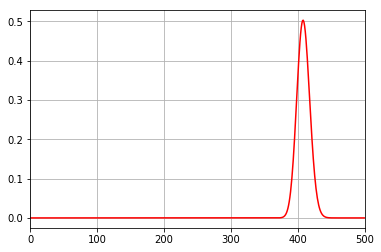

In [6]:
%reset -sf 
%matplotlib inline
from scipy import *
from utils.utils import *
import matplotlib.pyplot as plt

nodes = 500
time =2000
V = zeros(nodes)
I = zeros(nodes)
r = zeros((time, nodes))  

dt = 1e-12
dx = 1e-3
Rs = 70
Rz = 170
L = 2.36e-7
C = 4.69e-11

def V0(t):
    #return sin(2*pi*t*0.005)
    return exp(-(t*0.7 -100)**2 / 1000.)


for t in range(time):
    
    for m in range(nodes-1):                
        I[m] = I[m] - (dt/(L*dx))*(V[m + 1] - V[m]) 
    
    
    V[0] = (1-2.0*dt/(Rs*C*dx))*V[0] + (2*dt)/(Rs*C*dx)*V0(t) - (2*dt)/(C*dx)*I[0]
    #print(V[0])
    
    for m in range(1,nodes-1):                       
        V[m] = V[m] - (dt/(C*dx))*(I[m] - I[m - 1])   
        
    V[nodes-1] = (1-2.0*dt/(Rz*C*dx))*V[nodes-1] + (2*dt)/(C*dx)*I[nodes-2]
    
    
        
    r[t,:] += V

#tm_plot([250,600, 1200], r)
#wv_plot(time, nodes, r)  

tm=[1500]
dt=r
fig = plt.figure()
ax = fig.add_subplot((len(tm))*100+10+(1+0) ) 
#        
ax.plot(dt[tm[0],:], 'r-', label='t=' + str(tm[0]) )
ax.set_xlim(0,500)
#ax.set_ylim(-1,1)
plt.grid()
plt.show()